## 2.5. plot GO terms change groups

In this notebook we will visualize (some of) the GO terms that we found in R script 2.4. If you don't want to run that script first, you can also use the file `results/change_score/change_score_groups_GO_terms.xlsx` on the Github repository.


In [1]:
### loading python libraries

# standard libraries
import numpy as np
import pandas as pd

# plotting libraries
from matplotlib import pyplot as plt
plt.rcParams['pdf.fonttype'] = 42 #for saving PDF with changeable text
plt.rcParams['ps.fonttype'] = 42 #for saving PDF with changeable text

# other 
import warnings
warnings.filterwarnings('ignore') #ignore filter warnings
import math

### Load data

Here, we load the GO terms from the groups of interest.

In [2]:
all_GO_terms = {}

for group in range(1,15):
    group = str(group)
    GO_terms_path = "../results/change_scores/change_groups_GO_terms.xlsx"
    GO_terms = pd.read_excel (GO_terms_path, sheet_name='group_'+group, index_col=0)
    all_GO_terms[group] = GO_terms

In [3]:
### view content 
all_GO_terms['14'][0:10]

,GO.ID,Term,Annotated,Significant,Expected,KS,genes
1,GO:0098542,defense response to other organism,117,42,23.90,0.000002,"Adar,Apobec3,Casp4,Ccl3,Ccl4,Clec2d,Ddx58,Ddx6..."
2,GO:0009607,response to biotic stimulus,129,43,26.35,0.000019,"Adar,Apobec3,Casp4,Ccl3,Ccl4,Clec2d,Ddx58,Ddx6..."
3,GO:0043207,response to external biotic stimulus,129,43,26.35,0.000019,"Adar,Apobec3,Casp4,Ccl3,Ccl4,Clec2d,Ddx58,Ddx6..."
4,GO:0051707,response to other organism,129,43,26.35,0.000019,"Adar,Apobec3,Casp4,Ccl3,Ccl4,Clec2d,Ddx58,Ddx6..."
5,GO:0045087,innate immune response,96,35,19.61,0.000020,"Adar,Apobec3,Casp4,Ccl3,Ccl4,Clec2d,Ddx58,Eif2..."
6,GO:0044419,interspecies interaction between organisms,133,43,27.17,0.000049,"Adar,Apobec3,Casp4,Ccl3,Ccl4,Clec2d,Ddx58,Ddx6..."
7,GO:0006950,response to stress,185,54,37.79,0.000067,"1600014C10Rik,Adar,Aida,Apobec3,Casp4,Ccl3,Ccl..."
8,GO:0006952,defense response,142,44,29.01,0.000140,"Adar,Apobec3,Casp4,Ccl3,Ccl4,Clec2d,Ddx58,Ddx6..."
9,GO:0098586,cellular response to virus,9,7,1.84,0.000300,"Adar,Ddx58,Ddx60,Ifih1,Irgm2,Lgals8,Zc3hav1"
10,GO:0009605,response to external stimulus,151,45,30.85,0.000350,"Adar,Apobec3,Casp4,Ccl3,Ccl4,Clec2d,Ddx58,Ddx6..."


### Plot GO terms

Here we will plot the GO terms of the selected groups and their assigned p-value.

In [4]:
### function to get the p-values of selected GO terms
def get_go_p_values(group="1", GO_idx=[0,1,2]):
    
    go_p_values = all_GO_terms[group].loc[GO_idx,"KS"].values
    go_p_values = -np.log10(go_p_values)
    
    go_terms = all_GO_terms[group].loc[GO_idx,"Term"].values
    go_p_values = pd.Series(go_p_values)
    go_p_values.index = go_terms
    
    return go_p_values

In [5]:
### get the p-values from pre-selected GO terms
p_values = {}

# group 2
GO_selected = range(1,6)
p_values["2"] = get_go_p_values(group="2", GO_idx=GO_selected)

# group 8
GO_selected = [4,7,8,9,10]
p_values["8"] = get_go_p_values(group="8", GO_idx=GO_selected)

# group 14
GO_selected = [1,2,3,4,5]
p_values["14"] = get_go_p_values(group="14", GO_idx=GO_selected)


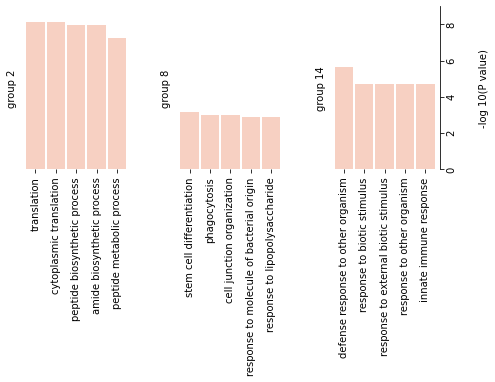

In [6]:
### plot selected GO terms and assigned p-values
fig, axs = plt.subplots(1, len(p_values), figsize=(2.5*len(p_values), 3),
                        gridspec_kw={'wspace':0.4})

axs = axs.ravel()

for idx, key in enumerate(p_values):
    p_values[key].plot(kind="bar", ax=axs[idx], width=0.9, color="#F7D0C2")
    axs[idx].set_ylabel('group '+key)

ymin = 0
ymax = int(math.ceil(max([max(p_values[key]) for key in p_values])))
    
for ax in axs.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_ylim([ymin, ymax])
    ax.yaxis.tick_right()
    for tick in ax.get_yticklabels():
        tick.set_rotation(90)

for i in range(len(p_values)-1):
    axs[i].set_yticks([])
    axs[i].spines['right'].set_visible(False)

# add title
plt.text(1.4, 0.5, "-log 10(P value)",ha='center',va='center', 
         transform=ax.transAxes, rotation='vertical')
    
# save figure
save_path = f"../figures/2.5.GO-terms_change_groups_{'_'.join(p_values.keys())}.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)

plt.show()

In [7]:
### get the p-values from one group 

# select group
slct_group = "1"
GO_selected = range(1,11) #change to [1,2,3,4,6,7] to select certain GO terms
p_values = get_go_p_values(group=slct_group, GO_idx=GO_selected)

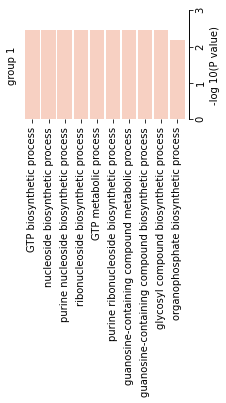

In [8]:
### plot selected GO terms and assigned p-values
fig, axs = plt.subplots(1, 1, figsize=(0.3*len(p_values), 2),gridspec_kw={'wspace':0})

p_values.plot(kind="bar", ax=axs, width=0.9, color="#F7D0C2")
axs.set_ylabel('group '+slct_group)

ymin = 0
ymax = int(math.ceil(max(p_values)))

axs.set_ylim([ymin, ymax])
axs.spines['top'].set_visible(False)
axs.spines['left'].set_visible(False)
axs.spines['bottom'].set_visible(False)
axs.set_yticks([])

axs2 = axs.twinx()
axs2.set_ylabel('-log 10(P value)')    
axs2.spines['top'].set_visible(False)
axs2.spines['left'].set_visible(False)
axs2.spines['bottom'].set_visible(False)
axs2.set_ylim([ymin, ymax])
axs2.yaxis.tick_right()

for tick in axs2.get_yticklabels():
    tick.set_rotation(90)
    
# save figure
save_path = f"../figures/2.5.GO-terms_change_group_{slct_group}.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)

plt.show()

### Supplementary figures GO terms

In [9]:
### get the p-values from pre-selected GO terms
p_values = {}

GO_selected = range(1,11)
p_values["1"] = get_go_p_values(group="1", GO_idx=GO_selected)

GO_selected = range(1,11)
p_values["3"] = get_go_p_values(group="3", GO_idx=GO_selected)

GO_selected = range(1,11)
p_values["4"] = get_go_p_values(group="4", GO_idx=GO_selected)

GO_selected = range(1,11)
p_values["5"] = get_go_p_values(group="5", GO_idx=GO_selected)

GO_selected = range(1,11)
p_values["6"] = get_go_p_values(group="6", GO_idx=GO_selected)

GO_selected = range(1,11)
p_values["7"] = get_go_p_values(group="7", GO_idx=GO_selected)

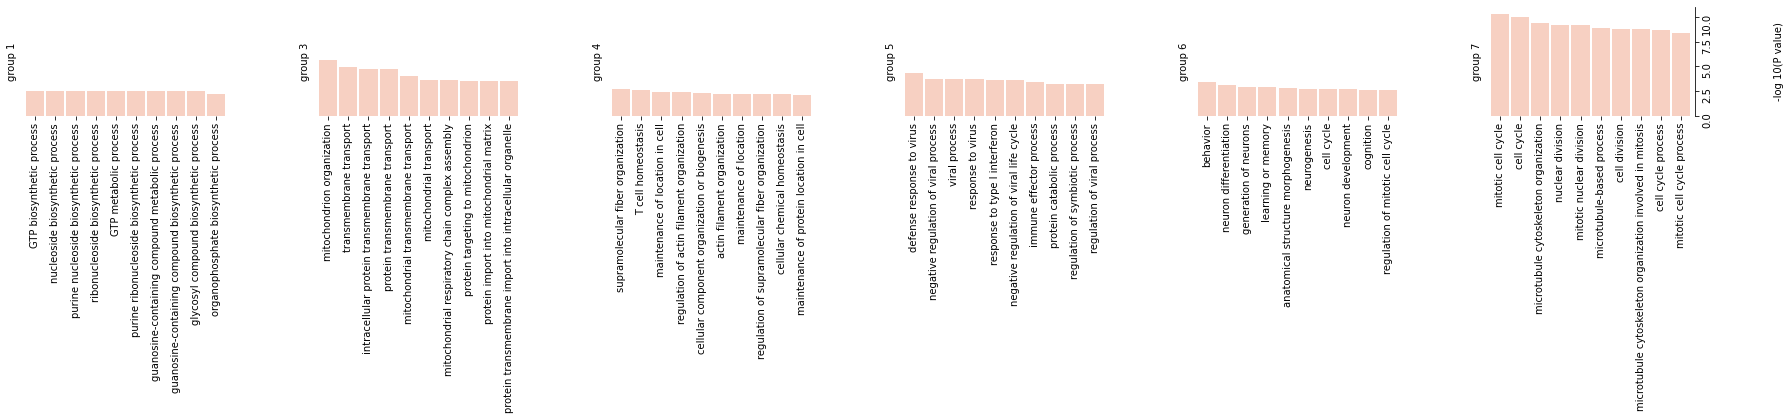

In [10]:
### plot selected GO terms and assigned p-values
fig, axs = plt.subplots(1, len(p_values), figsize=(5*len(p_values), 2),
                        gridspec_kw={'wspace':0.4})

axs = axs.ravel()

for idx, key in enumerate(p_values):
    p_values[key].plot(kind="bar", ax=axs[idx], width=0.9, color="#F7D0C2")
    axs[idx].set_ylabel('group '+key)

ymin = 0
ymax = int(math.ceil(max([max(p_values[key]) for key in p_values])))
    
for ax in axs.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_ylim([ymin, ymax])
    ax.yaxis.tick_right()
    for tick in ax.get_yticklabels():
        tick.set_rotation(90)

for i in range(len(p_values)-1):
    axs[i].set_yticks([])
    axs[i].spines['right'].set_visible(False)

# add title
plt.text(1.4, 0.5, "-log 10(P value)",ha='center',va='center', 
         transform=ax.transAxes, rotation='vertical')
    
# save figure
save_path = f"../figures/2.5.GO-terms_change_groups_{'_'.join(p_values.keys())}.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)

plt.show()

In [11]:
### get the p-values from pre-selected GO terms
p_values = {}

GO_selected = range(1,11)
p_values["9"] = get_go_p_values(group="9", GO_idx=GO_selected)

GO_selected = range(1,11)
p_values["10"] = get_go_p_values(group="10", GO_idx=GO_selected)

GO_selected = range(1,11)
p_values["11"] = get_go_p_values(group="11", GO_idx=GO_selected)

GO_selected = range(1,11)
p_values["12"] = get_go_p_values(group="12", GO_idx=GO_selected)

GO_selected = range(1,11)
p_values["13"] = get_go_p_values(group="13", GO_idx=GO_selected)

GO_selected = range(1,11)
p_values["7"] = get_go_p_values(group="7", GO_idx=GO_selected)

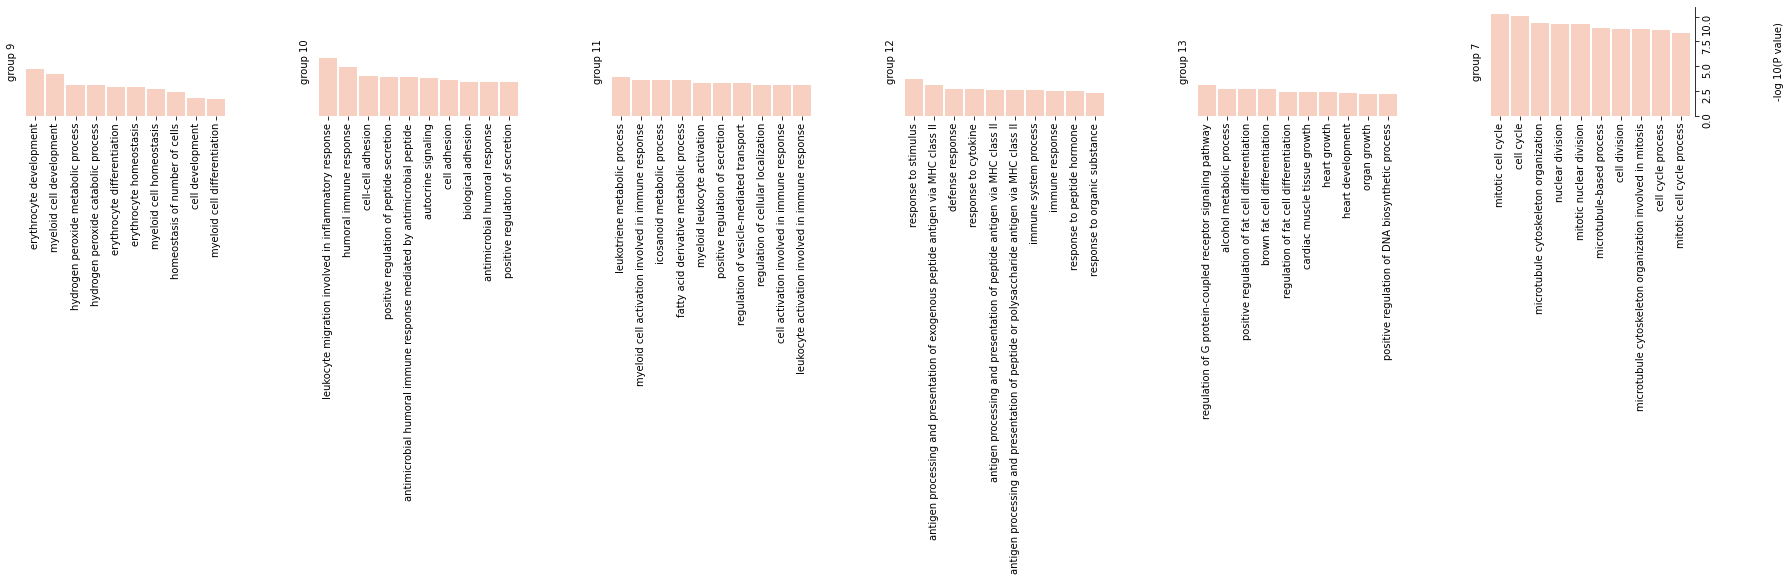

In [12]:
### plot selected GO terms and assigned p-values
fig, axs = plt.subplots(1, len(p_values), figsize=(5*len(p_values), 2),
                        gridspec_kw={'wspace':0.4})

axs = axs.ravel()

for idx, key in enumerate(p_values):
    p_values[key].plot(kind="bar", ax=axs[idx], width=0.9, color="#F7D0C2")
    axs[idx].set_ylabel('group '+key)

ymin = 0
ymax = int(math.ceil(max([max(p_values[key]) for key in p_values])))
    
for ax in axs.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_ylim([ymin, ymax])
    ax.yaxis.tick_right()
    for tick in ax.get_yticklabels():
        tick.set_rotation(90)

for i in range(len(p_values)-1):
    axs[i].set_yticks([])
    axs[i].spines['right'].set_visible(False)

# add title
plt.text(1.4, 0.5, "-log 10(P value)",ha='center',va='center', 
         transform=ax.transAxes, rotation='vertical')
    
# save figure
save_path = f"../figures/2.5.GO-terms_change_groups_{'_'.join(p_values.keys())}.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)

plt.show()